<a href="https://colab.research.google.com/github/SaiShanmukkha/Image-Processing/blob/main/HandsOn01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hands-on - Part 1,  Multimedia**

Author: Dr. Mylene Farias, Texas State University




**Summary**
1. Working with Google Colab, Python and Numpy
2. Working with Images (OpenCV)

References:
- https://docs.opencv.org/3.4/d2/d96/tutorial_py_table_of_contents_imgproc.html
- https://python.plainenglish.io/image-processing-using-opencv-in-python-857c8cb21767
- https://docs.scipy.org/doc/scipy/tutorial/ndimage.html#

To work with Google Colab, do not forget to import the libraries and mount your Google drive.

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Let's change to the specific directory where the images are located.

In [ ]:
print("DIR original:", os.getcwd())
os.chdir('/content/drive/MyDrive/Classroom/Multimedia/Hands-On/Practice-01')  #change to working directory
print("DIR working:", os.getcwd())
!ls

DIR: /content/drive/MyDrive/Classroom/Multimedia/Hands-On/Practice-01
DIR: /content/drive/MyDrive/Classroom/Multimedia/Hands-On/Practice-01
HandsOn01.ipynb  Lenna.png


## Working with Numpy

Let's just review some interesting functions in numpy.

In [ ]:
import numpy as np # already loaded, but just to remember ...

dim = (3,6)
zeros = np.zeros(dim, dtype='uint8')
print(zeros,'\n')

ones = np.ones(dim, dtype='uint8')
print(ones,'\n')

empty = np.empty(dim, dtype='uint8')
print(empty,'\n')

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]] 

[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]] 

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]] 



In [ ]:
vet = []; # empty vector
for i in range(0, 64, 1) :
  vet.append(10+i);
print(vet)


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


In [ ]:
# Data type
arr = np.array([[1,2,3], [4,5,6]])
print("type arr ", type(arr))
print("type arr element", type(arr[0,0]))
arr = arr.astype('float64')
print(arr.dtype)
arr = arr.astype('uint8')
print(arr.dtype)



type arr  <class 'numpy.ndarray'>
type arr element <class 'numpy.int64'>
float64
uint8


In [ ]:
# Basic operations
print(arr, "type", type(arr))
# Sum
arr = arr + 10
#arr = arr + np.array([])
print("Sum:\n",arr)
# Subtração
arr = arr - 10
#arr = arr + np.array([])
print("Subtraction:\n",arr)
# Multiplicação
arr = arr*2
print("Multiplication:\n",arr)
# Divisão
arr = arr/2
print("Division:\n",arr)
#Transposto
arr = arr.T
print("Transpose:\n",arr)

[[1 2 3]
 [4 5 6]] type <class 'numpy.ndarray'>
Sum:
 [[11 12 13]
 [14 15 16]]
Subtraction:
 [[1 2 3]
 [4 5 6]]
Multiplication:
 [[ 2  4  6]
 [ 8 10 12]]
Division:
 [[1. 2. 3.]
 [4. 5. 6.]]
Transpose:
 [[1. 4.]
 [2. 5.]
 [3. 6.]]


In [ ]:
import numpy as np
arr1 = np.array([[1,2],[4,5]], dtype='uint8')
print("Array is:\n", arr1)
id = [[1,0],[0,1]]
id = np.array(id)

print("Matrix product:\n",np.matmul(arr1, id))
print("Dot product:\n",np.dot(arr1, id))

Array is:
 [[1 2]
 [4 5]]
Matrix product:
 [[1 2]
 [4 5]]
Dot product:
 [[1 2]
 [4 5]]


In [ ]:
# Shape
arr2 = np.array([[1,2],[4,5],[5,6]], dtype='uint8')
print("arr2:\n", arr2)
print("dimensions of arr2: ", np.shape(arr2))
print("dimensions of arr2: ", arr2.shape)
print("1st dimension of arr2: ", np.shape(arr2[:,0]))
print("2nd dimension of arr2: ", np.shape(arr2[0,:]))

rows , cols = np.shape(arr2)
print("dimensions of arr2 - ", 'rows:',rows,'; cols:',cols)

# Reshape
a1 = np.arange(0,12)
print('\nBefore reshapping,  a1:\n ', a1)

a1_2d = a1.reshape(3, 4)
print('After reshapping, new a1:\n ', a1_2d)
print("A slice of the vector with a step:\n ", a1_2d[:2:])

arr2:
 [[1 2]
 [4 5]
 [5 6]]
dimensions of arr2:  (3, 2)
dimensions of arr2:  (3, 2)
1st dimension of arr2:  (3,)
2nd dimension of arr2:  (2,)
dimensions of arr2 -  rows: 3 ; cols: 2

Before reshapping,  a1:
  [ 0  1  2  3  4  5  6  7  8  9 10 11]
After reshapping, new a1:
  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
A slice of the vector with a step:
  [[0 1 2 3]
 [4 5 6 7]]


In [ ]:
# Flatten/ravel
print(a1_2d.ravel())

# Stack & Append
a1 = np.arange(1, 13)  # numbers 1 to 12
a2 = np.arange(13,25)
print("a1", a1)
print("a2", a2)
print("a1 hstack a2 = \n", np.stack((a1,a2)))
print("a2 hstack a1 = \n", np.stack((a2,a1)))
print("a1 append a2 = \n", np.append(a1,a2))

[ 0  1  2  3  4  5  6  7  8  9 10 11]
a1 [ 1  2  3  4  5  6  7  8  9 10 11 12]
a2 [13 14 15 16 17 18 19 20 21 22 23 24]
a1 hstack a2 = 
 [[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [13 14 15 16 17 18 19 20 21 22 23 24]]
a2 hstack a1 = 
 [[13 14 15 16 17 18 19 20 21 22 23 24]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]]
a1 append a2 = 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


## Working with Imagens (OpenCV)


DIR working: /content/drive/MyDrive/Classroom/Multimedia/Hands-On/Practice-01
HandsOn01.ipynb  Lenna.png


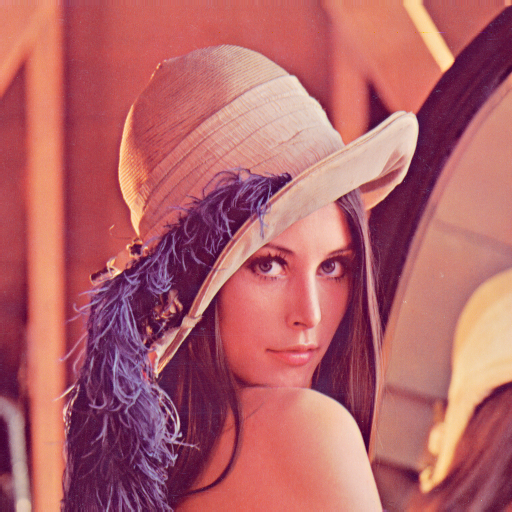

In [ ]:
import cv2
print("DIR working:", os.getcwd())
!ls
image = cv2.imread('Lenna.png')
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
# Let's check the type of the image and its structure
print("type:", type(image))
print("dimensions:", image.shape)

type: <class 'numpy.ndarray'>
dimensions: (512, 512, 3)


In [ ]:
# closer look at a small
print('\n Janela 50x50 da imagem;\n',image[:50,:50,0])

# Min
print('\n Min:',np.min(image))
# Max
print('\n Max:',np.max(image))
# Average
print('\n Avg:',np.mean(image))



 Janela 50x50 da imagem;
 [[125 125 133 ... 121 119 116]
 [125 125 133 ... 121 119 116]
 [125 125 133 ... 121 119 116]
 ...
 [125 125 107 ... 119 116 102]
 [115 115 107 ... 113 118 109]
 [119 119 114 ... 117 120 107]]

 Min: 3

 Max: 255

 Média: 128.22837575276694

 Número de pixels:  (786432,)


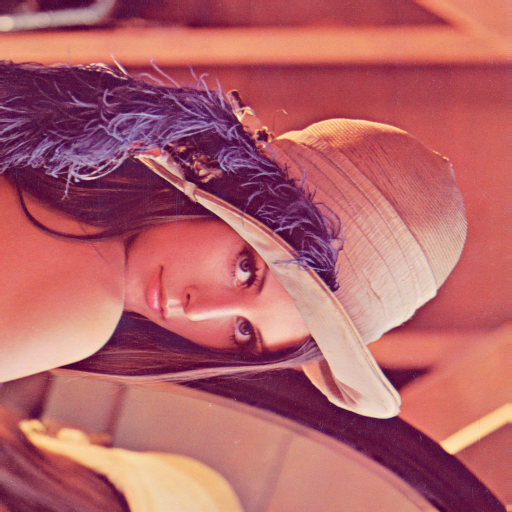

In [ ]:
# Rotate an image
# https://note.nkmk.me/en/python-opencv-numpy-rotate-flip/#:~:text=Rotate%20image%20with%20OpenCV%3A%20cv2.,-rotate()&text=The%20OpenCV%20function%20that%20rotates,rotate()%20.&text=Specify%20the%20original%20ndarray%20as,as%20the%20second%20argument%20rotateCode%20.
cv2_imshow(cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE))

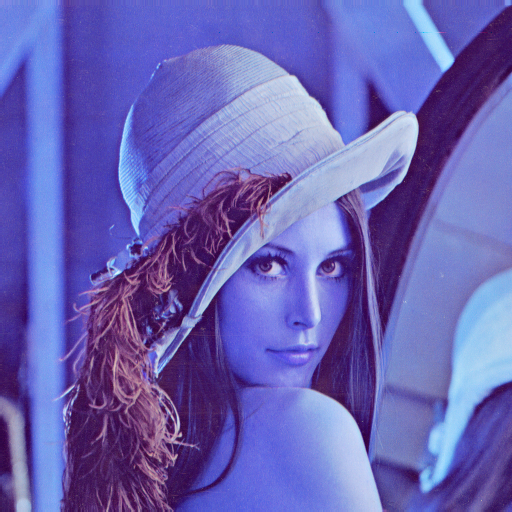

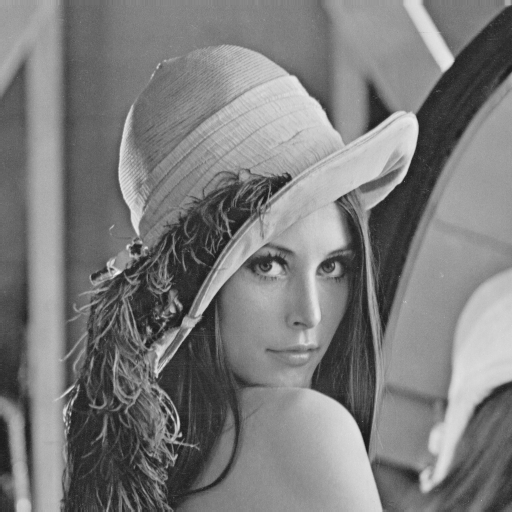

In [ ]:
# Color Mapping(Gray, RGB, BGR)
image_BGR = cv2.cvtColor(image , cv2.COLOR_RGB2BGR)
cv2_imshow(image_BGR)
image_L = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
cv2_imshow(image_L)

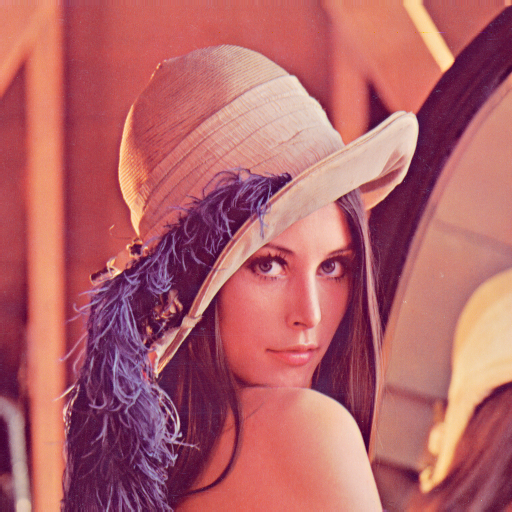

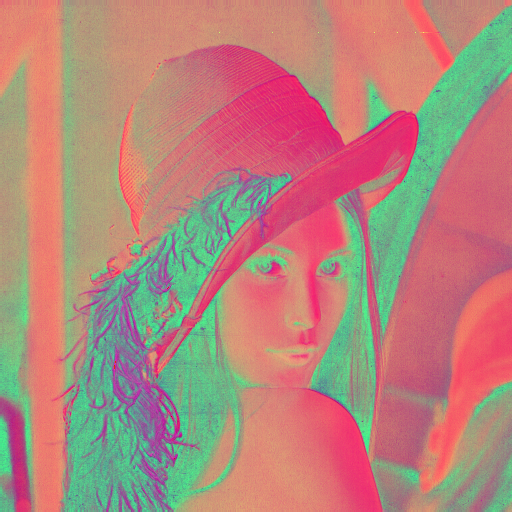

In [ ]:
cv2_imshow(image)
image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
cv2_imshow(image_HSV)


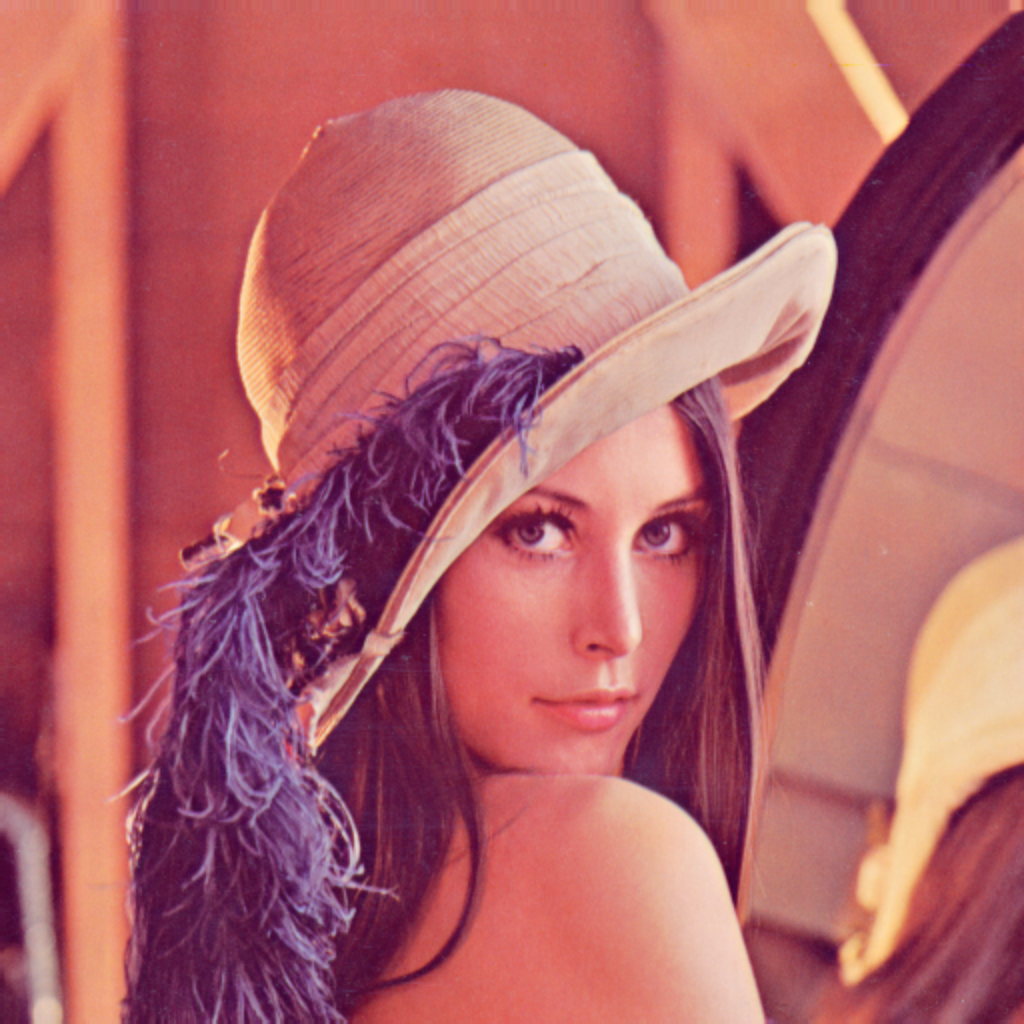

In [ ]:
# Resize
(outputDim1, outputDim2)=(1024,1024)
resized = cv2.resize(image, (outputDim1,outputDim2), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized)

In [ ]:
# Imsave
cv2.imwrite('Big_Lenna.png',resized)

True

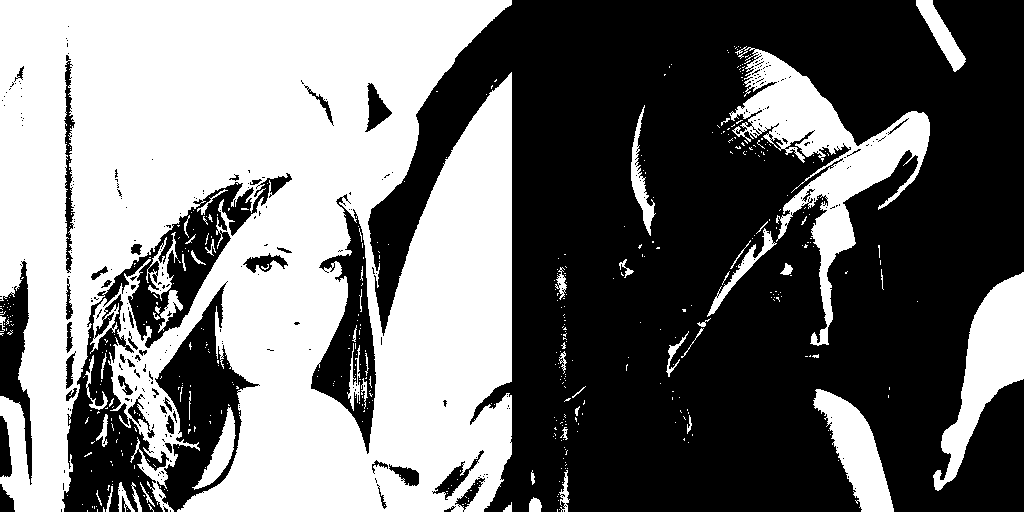

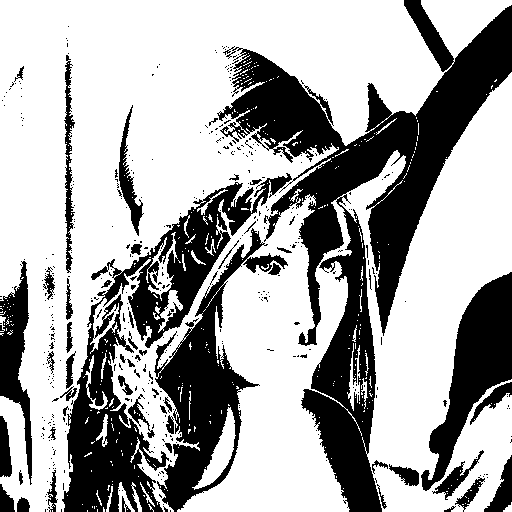

In [ ]:
# Generating a binary image

def img_binary(img, thresh):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_bin = (img > thresh) * 255
  return img_bin

lenna80 = img_binary(image, thresh=80)
lenna180 = img_binary(image, thresh=180)

# Concatenating the two images for better visualization
lennasBinary = np.concatenate((lenna80,lenna180),axis=1)
cv2_imshow(lennasBinary)

lennasDiff = (lenna80-lenna180)
cv2_imshow(lennasDiff)

Como acessar uma imagem disponível na internet?

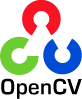

In [ ]:
# How can we read an image online
import urllib

url = "www.github.com/lucas-althoff/PDI-UnB/blob/master/Listas/lenna_cinza.png"
req = urllib.request.urlopen('http://answers.opencv.org/upfiles/logo_2.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_online = cv2.imdecode(arr, -1)
cv2_imshow(img_online)